# Two Assets

1 Portfolio Choice with Multiple Assets - Financial Engineering by Simon Benninga [youtube](https://www.youtube.com/watch?v=f6slIClVSXw&list=PL49E8B0672C047CE1)

# Basic Statistics of Two Assets

$$\begin{array}{llllll}
\mbox{Daily Return}&&\displaystyle
{\bf r}_t
=
\left[\begin{array}{c}
r^{(1)}_t\\r^{(2)}_t
\end{array}\right]
=
\left[\begin{array}{c}
\frac{S^{(1)}_t-S^{(1)}_{t-1}}{S^{(1)}_{t-1}}\\\frac{S^{(2)}_t-S^{(2)}_{t-1}}{S^{(2)}_{t-1}}
\end{array}\right]
\nonumber\\
\\
\mbox{Expected return}&&\displaystyle
\mu=252*E{\bf r}_t=
\left[\begin{array}{c}
\mu_1\\\mu_2
\end{array}\right]\nonumber\\
\\
\mbox{Covariance}&&\displaystyle
\Sigma
=
252*E({\bf r}_t-E{\bf r}_t)({\bf r}_t-{\bf r}_t)^T
=
\left[\begin{array}{cc}
\sigma_1^2&\sigma_{12}\\
\sigma_{21}&\sigma_{2}^2
\end{array}\right]\nonumber
\end{array}$$

# Basic Statistics of Portfolio

$$\begin{array}{llll}
\mbox{Portfolio}&&\displaystyle
{\bf x}
=
\left[\begin{array}{c}
x_1\\x_2
\end{array}\right]
\quad\mbox{with}\quad
{\bf 1}^T{\bf x}=1\nonumber\\
\\
\mbox{Return}&&\displaystyle
r_{{\bf x}}
=
{\bf r}^T{\bf x}\nonumber\\
\\
\mbox{Expected return}&&\displaystyle
\mu_{{\bf x}}
=
\mu^T{\bf x}\nonumber\\
\\
\mbox{Variance}&&\displaystyle
\sigma_{{\bf x}}^2
=
{\bf x}^T\Sigma{\bf x}\nonumber
\end{array}$$

In [1]:
# import modules
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# make directory if not exist
if not os.path.isdir("img"):
    os.mkdir('img')

In [3]:
# read csv file
start = "2017-01-01"
end   = "2017-12-31"
dates = pd.date_range(start, end)

benchmark   = "SPY" 
ticker_list = ["WMT", benchmark]

data_dir = "../data/finance/dow30"

for data_type in ["Open", "High", "Low", "Close", "Adj Close", "Volume"]:
        
    df = pd.DataFrame(index=dates) 
    for ticker in ticker_list: 
        csv_file_path = os.path.join(data_dir, ticker + ".CSV") 
            
        df_temp = pd.read_csv(csv_file_path,
                              index_col="Date",
                              parse_dates=True,
                              usecols=["Date", data_type],
                              na_values=["null"]) 
            
        df_temp = df_temp.rename(columns={data_type: ticker})
        df = df.join(df_temp)

        if ticker == benchmark:
            df = df.dropna(subset=[benchmark])

    if data_type == "Open":
        df_open = df
    if data_type == "High":
        df_high = df   
    if data_type == "Low":
        df_low = df    
    if data_type == "Close":
        df_close = df
    if data_type == "Adj Close":
        df_adj_close = df
    if data_type == "Volume":
        df_volume = df   

In [4]:
df_adj_close.head()

,WMT,SPY
2017-01-03,66.929802,220.944565
2017-01-04,67.319717,222.259018
2017-01-05,67.465942,222.082443
2017-01-06,66.539886,222.876999
2017-01-09,66.978539,222.141312


In [5]:
df_adj_close.tail()

,WMT,SPY
2017-12-22,98.209999,267.510010
2017-12-26,99.160004,267.190002
2017-12-27,99.260002,267.320007
2017-12-28,99.400002,267.869995
2017-12-29,98.750000,266.859985


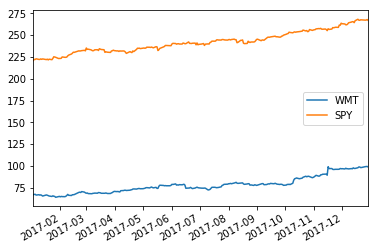

In [6]:
df_adj_close.plot()

In [7]:
# normalize price
df_normalized_adj_close = df_adj_close / df_adj_close.iloc[0,:]  

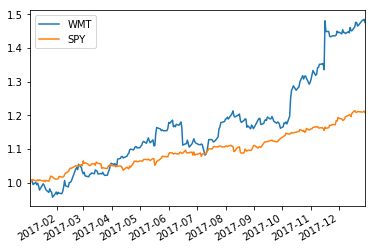

In [8]:
df_normalized_adj_close.plot()
plt.savefig('img/two asset normalized adj close.png')

In [9]:
# compute daily return
df_daily_return = df_adj_close.pct_change()

In [10]:
df_daily_return.head()

,WMT,SPY
2017-01-03,NaN,NaN
2017-01-04,0.005826,0.005949
2017-01-05,0.002172,-0.000794
2017-01-06,-0.013726,0.003578
2017-01-09,0.006592,-0.003301


In [11]:
df_daily_return.describe()

,WMT,SPY
count,250.000000,250.000000
mean,0.001621,0.000764
std,0.011484,0.004234
min,-0.046509,-0.017744
25%,-0.003651,-0.001206
50%,0.001470,0.000517
75%,0.006166,0.002498
max,0.108984,0.013997


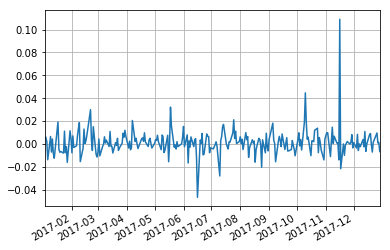

In [12]:
df_daily_return.WMT.plot()
plt.grid()

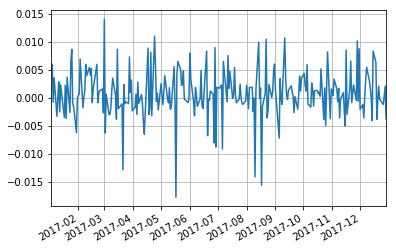

In [13]:
df_daily_return.SPY.plot()
plt.grid()

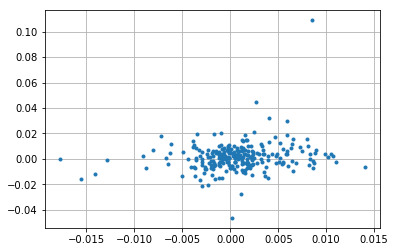

In [14]:
plt.plot(df_daily_return.SPY, df_daily_return.WMT, '.')
plt.grid()

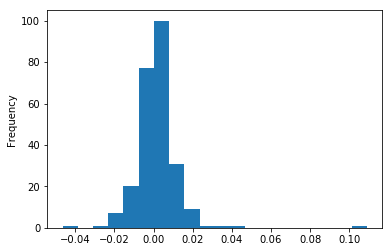

In [15]:
df_daily_return.WMT.plot(kind="hist", bins=20)

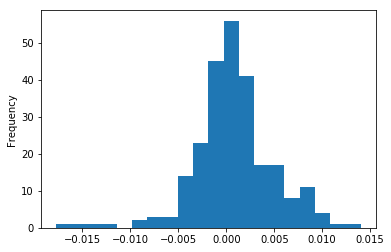

In [16]:
df_daily_return.SPY.plot(kind="hist", bins=20)

In [17]:
# compute expected return
def compute_expected_return(df_daily_return):
    return 252 * df_daily_return.mean() 
df_mu = compute_expected_return(df_daily_return)

In [18]:
df_mu

WMT    0.408517
SPY    0.192646
dtype: float64

In [19]:
# compute volatility 
def compute_volatility(df_daily_return):
    return np.sqrt(252) * df_daily_return.std()
df_vol = compute_volatility(df_daily_return)

In [20]:
df_vol

WMT    0.182298
SPY    0.067219
dtype: float64

In [21]:
# compute covariance matrix
def compute_covariance_matrix(df_daily_return):
    return 252 * df_daily_return.cov()
df_cov = compute_covariance_matrix(df_daily_return)

In [22]:
df_cov

,WMT,SPY
WMT,0.033232,0.002313
SPY,0.002313,0.004518


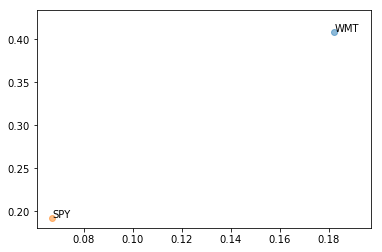

In [23]:
# plot risk-return plot
fig, ax = plt.subplots()
for i, ticker in enumerate(ticker_list):
    ax.scatter(df_vol[i], df_mu[i], alpha=0.5)
    ax.annotate(ticker, (df_vol[i],df_mu[i]))
plt.savefig('img/two asset risk-return plot.png')

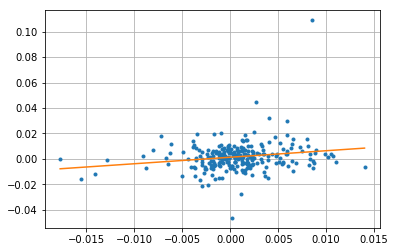

In [24]:
# linear regression
x =  df_daily_return.SPY[1:]
y =  df_daily_return.WMT[1:]

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
y_pred = model.predict(x[:, np.newaxis])

xfit = np.linspace(x.min(), x.max(), 2)
yfit = model.predict(xfit[:, np.newaxis])

plt.plot(x, y, '.')
plt.plot(xfit, yfit)
plt.grid()

plt.savefig('img/two asset linear regression.png')

In [25]:
model?

In [26]:
model.coef_

array([0.51190786])

In [27]:
beta = model.coef_[0]
beta

0.5119078567482339

In [28]:
model.intercept_

0.0012297635581712898

In [29]:
alpha = model.intercept_
alpha

0.0012297635581712898

In [30]:
model.residues_

/Users/sungchul/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


0.0316668189953595

In [31]:
np.sum((y-y_pred)**2)

0.03166681899535948

In [32]:
R_square = 1 - (np.sum((y-y_pred)**2) / np.sum((y-y.mean())**2))
R_square

0.03562920714140039

In [33]:
# performance of linear regression
alpha = model.intercept_
beta = model.coef_[0]
R_square = 1 - (np.sum((y-y_pred)**2) / np.sum((y-y.mean())**2))

In [34]:
df_normalized_adj_close.head()

,WMT,SPY
2017-01-03,1.000000,1.000000
2017-01-04,1.005826,1.005949
2017-01-05,1.008010,1.005150
2017-01-06,0.994174,1.008746
2017-01-09,1.000728,1.005417


In [35]:
# construction of equal portfolio
portfolio_weight = [0.5, 0.5]
df_portfolio = df_normalized_adj_close.copy()
df_portfolio['Portfolio'] = (portfolio_weight * df_normalized_adj_close).sum(axis=1) 

In [36]:
df_normalized_adj_close.head()

,WMT,SPY
2017-01-03,1.000000,1.000000
2017-01-04,1.005826,1.005949
2017-01-05,1.008010,1.005150
2017-01-06,0.994174,1.008746
2017-01-09,1.000728,1.005417


In [37]:
df_portfolio.head()

,WMT,SPY,Portfolio
2017-01-03,1.000000,1.000000,1.000000
2017-01-04,1.005826,1.005949,1.005887
2017-01-05,1.008010,1.005150,1.006580
2017-01-06,0.994174,1.008746,1.001460
2017-01-09,1.000728,1.005417,1.003072


In [38]:
df_normalized_adj_close.head()

,WMT,SPY
2017-01-03,1.000000,1.000000
2017-01-04,1.005826,1.005949
2017-01-05,1.008010,1.005150
2017-01-06,0.994174,1.008746
2017-01-09,1.000728,1.005417


In [39]:
# compute statistics
df_daily_return = df_portfolio.pct_change() 
df_mu = compute_expected_return(df_daily_return)
df_vol = compute_volatility(df_daily_return)
df_cov = compute_covariance_matrix(df_daily_return)

In [40]:
df_daily_return

,WMT,SPY,Portfolio
2017-01-03,NaN,NaN,NaN
2017-01-04,0.005826,0.005949,0.005887
2017-01-05,0.002172,-0.000794,0.000689
2017-01-06,-0.013726,0.003578,-0.005087
2017-01-09,0.006592,-0.003301,0.001610
2017-01-10,-0.006986,0.000000,-0.003485
2017-01-11,0.004397,0.002826,0.003607
2017-01-12,-0.008172,-0.002510,-0.005326
2017-01-13,-0.012358,0.002296,-0.004974
2017-01-17,0.019216,-0.003524,0.007673


In [41]:
df_mu

WMT          0.408517
SPY          0.192646
Portfolio    0.301929
dtype: float64

In [42]:
df_vol

WMT          0.182298
SPY          0.067219
Portfolio    0.106061
dtype: float64

In [43]:
df_cov

,WMT,SPY,Portfolio
WMT,0.033232,0.002313,0.018409
SPY,0.002313,0.004518,0.003411
Portfolio,0.018409,0.003411,0.011249


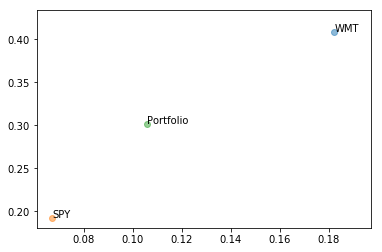

In [44]:
# plot risk-return plot
ticker_list = ['WMT', 'SPY', 'Portfolio']
fig, ax = plt.subplots()
for i, ticker in enumerate(ticker_list):
    ax.scatter(df_vol[i], df_mu[i], alpha=0.5)
    ax.annotate(ticker, (df_vol[i],df_mu[i]))
plt.savefig('img/two asset with portfolio risk-return plot.png')

In [45]:
df_normalized_adj_close.shape

(251, 2)

In [46]:
# compute statistics of many random portfolios
num_assets     = df_normalized_adj_close.shape[1]
num_portfolios = 25000 
mc_results     = np.zeros((num_portfolios, 3 + num_assets))

for i in range(num_portfolios):
    portfolio_weight  = np.random.random(num_assets)
    portfolio_weight /= np.sum(portfolio_weight) 
    
    df_portfolio    = (portfolio_weight * df_normalized_adj_close).sum(axis=1)
    df_daily_return = df_portfolio.pct_change()
    
    df_mu  = compute_expected_return(df_daily_return)
    df_vol = compute_volatility(df_daily_return) 

    mc_results[i,0] = df_mu
    mc_results[i,1] = df_vol
    mc_results[i,2] = df_mu / df_vol

    for j in range(num_assets):           
        mc_results[i, j+3] = portfolio_weight[j]
        
columns = ['mu','vol','sharpe']
for j in range(num_assets):           
    columns.append(df_normalized_adj_close.columns[j] + '_weight')
    
pd_mc_results = pd.DataFrame(mc_results, columns=columns)

In [47]:
pd_mc_results.head()

,mu,vol,sharpe,WMT_weight,SPY_weight
0,0.228182,0.069192,3.297805,0.161221,0.838779
1,0.405823,0.180295,2.250880,0.987209,0.012791
2,0.216374,0.066954,3.231682,0.107509,0.892491
3,0.371076,0.154640,2.399607,0.822971,0.177029
4,0.274974,0.089467,3.073476,0.375501,0.624499


In [48]:
pd_mc_results.shape

(25000, 5)

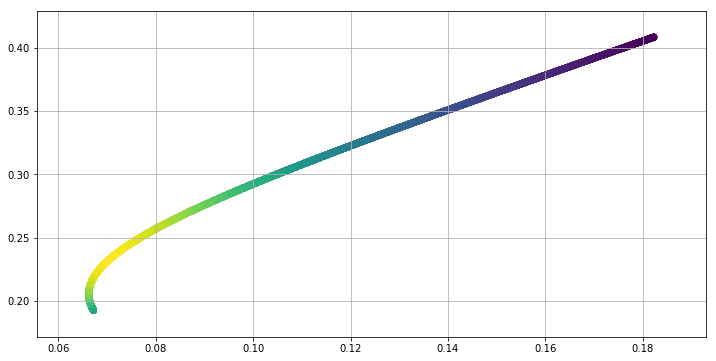

In [49]:
# plot risk-return plot
plt.figure(figsize=(12,6))
plt.scatter(pd_mc_results.vol, 
            pd_mc_results.mu,  
            c=pd_mc_results.sharpe)
plt.grid()
plt.savefig('img/many random portfolios risk-return plot.png')

In [50]:
pd_mc_results.head()

,mu,vol,sharpe,WMT_weight,SPY_weight
0,0.228182,0.069192,3.297805,0.161221,0.838779
1,0.405823,0.180295,2.250880,0.987209,0.012791
2,0.216374,0.066954,3.231682,0.107509,0.892491
3,0.371076,0.154640,2.399607,0.822971,0.177029
4,0.274974,0.089467,3.073476,0.375501,0.624499


In [51]:
pd_mc_results.sharpe.idxmax()

21236

In [52]:
pd_mc_results.iloc[pd_mc_results.sharpe.idxmax(), :]

mu            0.233639
vol           0.070704
sharpe        3.304483
WMT_weight    0.186093
SPY_weight    0.813907
Name: 21236, dtype: float64

In [53]:
# portfolio with highest sharpe ratio
max_sharpe_port = pd_mc_results.iloc[pd_mc_results.sharpe.idxmax()]

In [54]:
max_sharpe_port

mu            0.233639
vol           0.070704
sharpe        3.304483
WMT_weight    0.186093
SPY_weight    0.813907
Name: 21236, dtype: float64

In [55]:
# GMVP
min_vol_port = pd_mc_results.iloc[pd_mc_results.vol.idxmin()] 

In [56]:
min_vol_port 

mu            0.205408
vol           0.066259
sharpe        3.100083
WMT_weight    0.057755
SPY_weight    0.942245
Name: 22424, dtype: float64

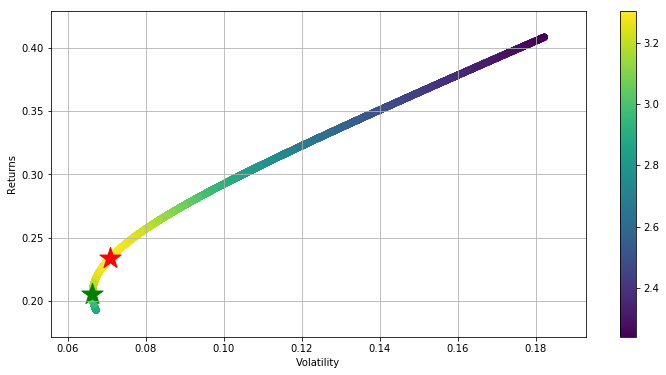

In [57]:
# plot risk-return plot with GMVP and portfolio with highest sharpe ratio 
plt.figure(figsize=(12,6))
plt.scatter(pd_mc_results.vol, 
            pd_mc_results.mu, 
            c=pd_mc_results.sharpe)
plt.colorbar()
plt.grid()

plt.xlabel('Volatility')
plt.ylabel('Returns')

plt.scatter(max_sharpe_port[1], max_sharpe_port[0], c='r',
            marker='*', s=500)
plt.scatter(min_vol_port[1],  min_vol_port[0], c='g',
            marker='*', s=500)

plt.savefig('img/two asset efficient frontier.png')